In [2]:
import pandas as pd  #to manipulate the data,dataframe,access the data
import numpy as np  #to handle multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Drug.csv")
df.head(5)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [4]:
'''
multiclass classification problem
Age Type: Numeric (Integer)
Sex Type: Categorical Values: M, F
BP (Blood Pressure) Type: (Categorical) Values: LOW, NORMAL, HIGH
Cholesterol Type: (Categorical) Values: NORMAL, HIGH
Na (Sodium content in blood) Type: Continuous Numeric
K (Potassium) Type: Continuous Numeric 
Drug (Target column – prescribed drug) Type: Categorical Values (5 classes): (drugY, drugC, drugX, drugA, drugB)

#One thing: Logistic Regression by default is binary classification (yes/no, 0/1).
But here, Drug has 5 categories (drugY, drugC, drugX, drugA, drugB)  
# So your target column = Drug.
dtypes: float64(2), int64(1), object(4)
here are no null values
In this Drug data no duplicates
Sex
M    104
F     96

Drug  in percent
drugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
'''

'\nmulticlass classification problem\nAge Type: Numeric (Integer)\nSex Type: Categorical Values: M, F\nBP (Blood Pressure) Type: (Categorical) Values: LOW, NORMAL, HIGH\nCholesterol Type: (Categorical) Values: NORMAL, HIGH\nNa (Sodium content in blood) Type: Continuous Numeric\nK (Potassium) Type: Continuous Numeric \nDrug (Target column – prescribed drug) Type: Categorical Values (5 classes): (drugY, drugC, drugX, drugA, drugB)\n\n#One thing: Logistic Regression by default is binary classification (yes/no, 0/1).\nBut here, Drug has 5 categories (drugY, drugC, drugX, drugA, drugB)  \n# So your target column = Drug.\ndtypes: float64(2), int64(1), object(4)\nhere are no null values\nIn this Drug data no duplicates\nSex\nM    104\nF     96\n\nDrug  in percent\ndrugY    45.5\ndrugX    27.0\ndrugA    11.5\ndrugC     8.0\ndrugB     8.0\n'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [6]:
(df.isnull().sum()/len(df))*100

Age            0.0
Sex            0.0
BP             0.0
Cholesterol    0.0
Na             0.0
K              0.0
Drug           0.0
dtype: float64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [8]:
(df["Drug"].value_counts()/len(df))*100                # unbalanced distribution 

Drug
drugY    45.5
drugX    27.0
drugA    11.5
drugC     8.0
drugB     8.0
Name: count, dtype: float64

In [9]:
df["Sex"].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [10]:
df.nunique().sort_values()

Sex              2
Cholesterol      2
BP               3
Drug             5
Age             57
Na             200
K              200
dtype: int64

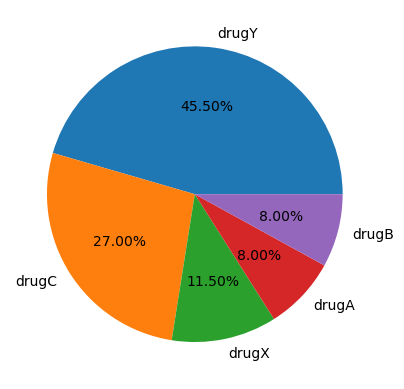

In [11]:
plt.pie(df["Drug"].value_counts(), autopct="%.2f%%", labels=df["Drug"].unique())
plt.show()

In [12]:
df.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [15]:
# handling object data types--
# object datatype encoding-
obje_col=df.select_dtypes("object").columns
obje_col

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [16]:
for i in obje_col:
    print(df[i].value_counts())   # in balnce Drug 
    # agar app ka in  then go to next setps

Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


In [17]:
#using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
enc = OrdinalEncoder()
df[obje_col] = enc.fit_transform(df[obje_col])
df[obje_col]

,Sex,BP,Cholesterol,Drug
0,0.0,0.0,0.0,4.0
1,1.0,1.0,0.0,2.0
2,1.0,1.0,0.0,2.0
3,0.0,2.0,0.0,3.0
4,0.0,1.0,0.0,4.0
...,...,...,...,...
195,0.0,1.0,0.0,2.0
196,1.0,1.0,0.0,2.0
197,1.0,2.0,0.0,3.0
198,1.0,2.0,1.0,3.0


In [18]:
df.describe()

,Age,Sex,BP,Cholesterol,Na,K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,0.697095,0.050174,2.870000
std,16.544315,0.500854,0.821752,0.501029,0.118907,0.017611,1.372047
min,15.000000,0.000000,0.000000,0.000000,0.500169,0.020022,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.583887,0.035054,2.000000
50%,45.000000,1.000000,1.000000,0.000000,0.721853,0.049663,3.000000
75%,58.000000,1.000000,2.000000,1.000000,0.801494,0.066000,4.000000
max,74.000000,1.000000,2.000000,1.000000,0.896056,0.079788,4.000000


In [19]:
nul_col = df.select_dtypes(["int", "float"]).columns
nul_col

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug'], dtype='object')

<Axes: >

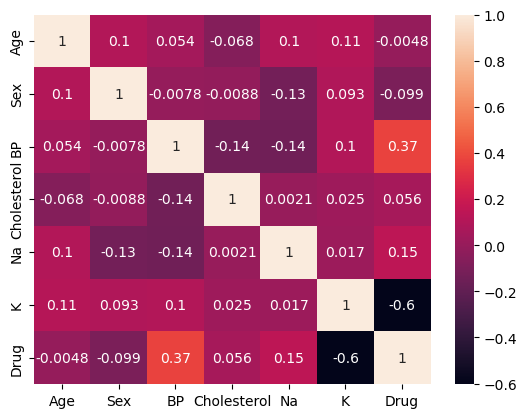

In [20]:
sns.heatmap(df[nul_col].corr(), annot=True)  #here are multi co-relations   # co-related with Drugs and BP nad Drug and k

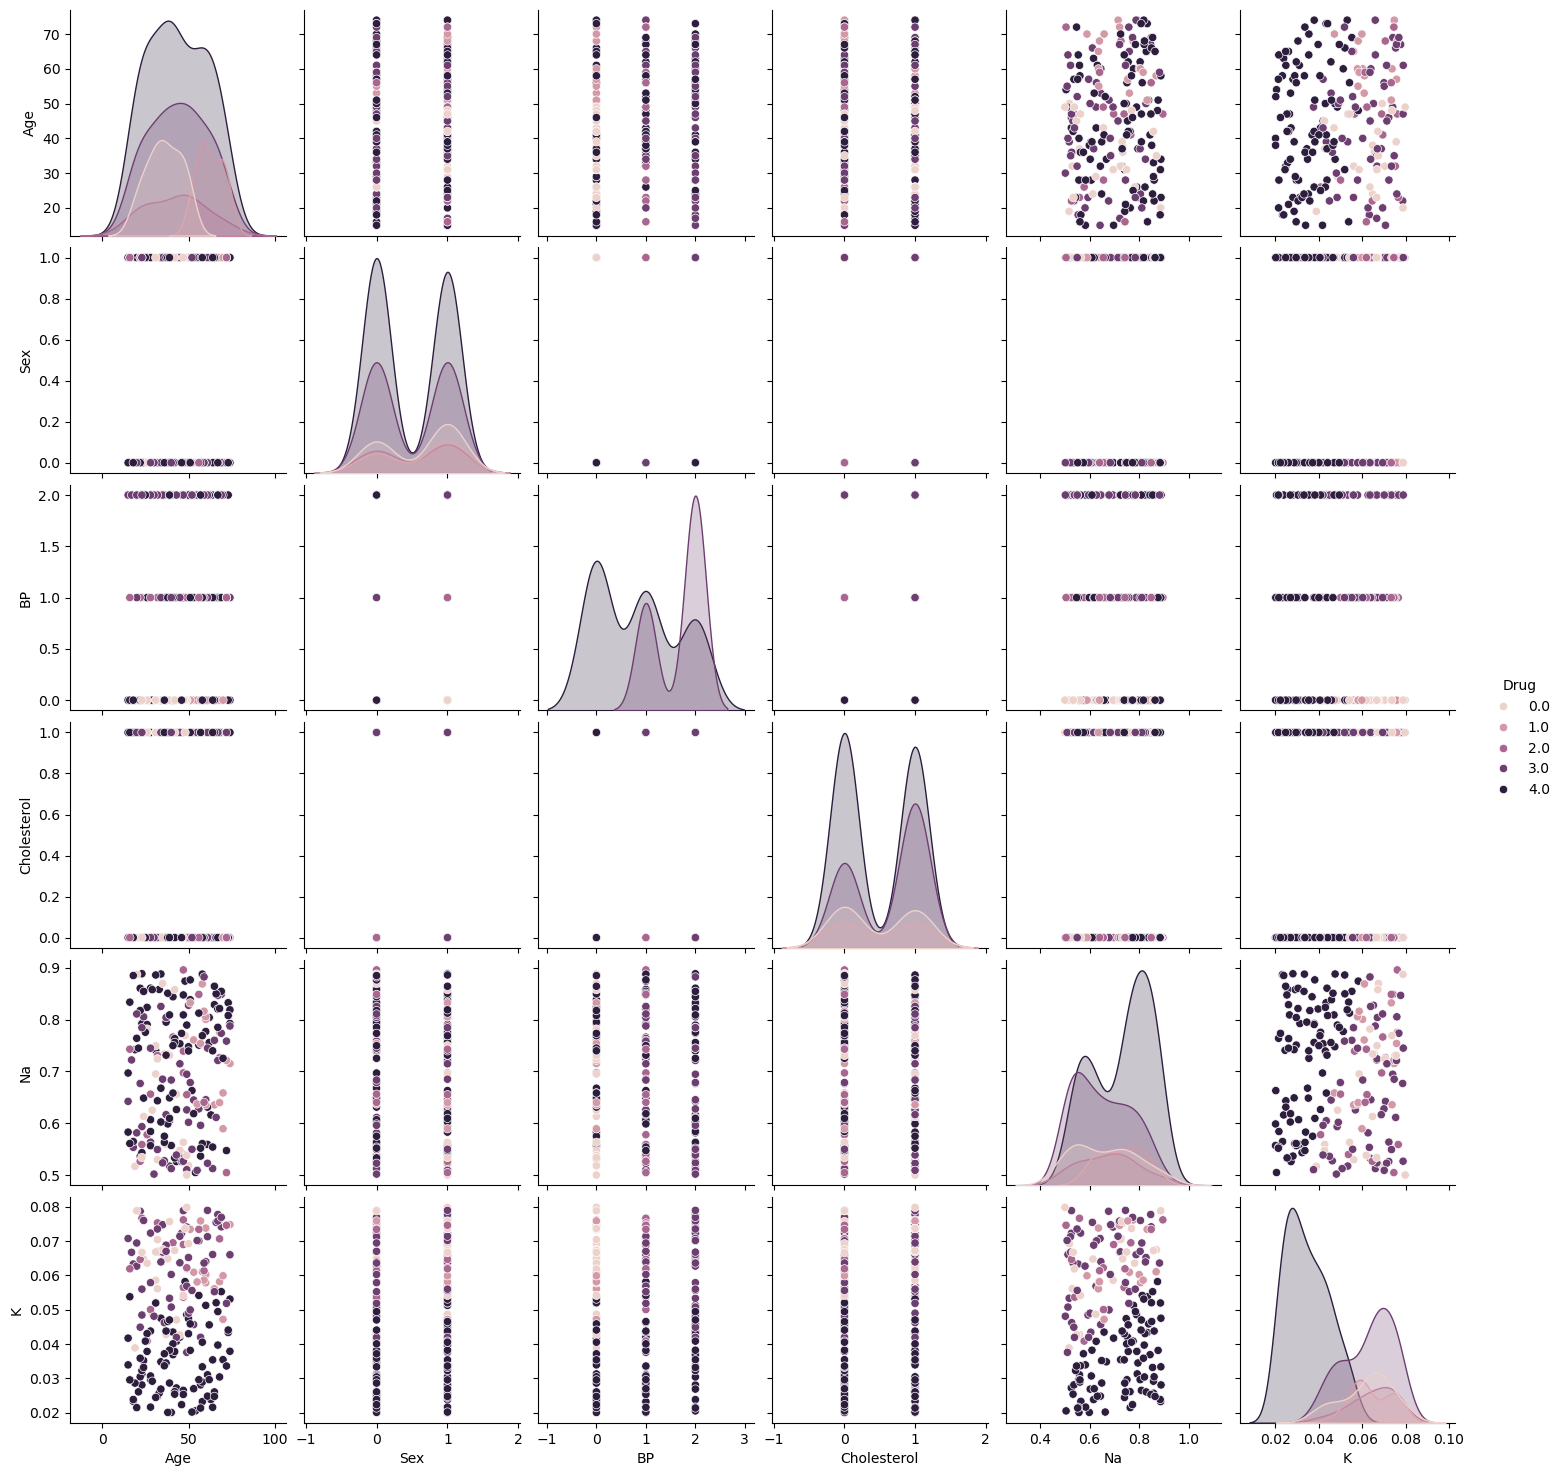

In [21]:
sns.pairplot(data=df,hue="Drug")

In [22]:
features=df.drop("Drug",axis=1)
target=df["Drug"]


In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=1,stratify=target)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    print(f"Training Score : {train_score}")
    print(f"Testing Score : {test_score}")
    print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
    print(f"Classification Report : \n{classification_report(ytest,ypred)}")
    return model

In [26]:
dt=mymodel(DecisionTreeClassifier())
dt     # here are overfitting  agar over fitting hai to go to prunning techniqueTraining Score : 1.0
#Testing Score : 0.85   # accuracy 85

Training Score : 1.0
Testing Score : 0.85
Confusion Matrix : 
[[ 4  0  0  1  0]
 [ 0  3  0  0  0]
 [ 0  0  2  0  1]
 [ 1  0  0 10  0]
 [ 1  0  0  2 15]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       1.00      1.00      1.00         3
         2.0       1.00      0.67      0.80         3
         3.0       0.77      0.91      0.83        11
         4.0       0.94      0.83      0.88        18

    accuracy                           0.85        40
   macro avg       0.87      0.84      0.85        40
weighted avg       0.87      0.85      0.85        40



DecisionTreeClassifier()

In [27]:
# feature importance
d={"columns":features.columns,
  "feature importance":dt.feature_importances_}
x=pd.DataFrame(d)
x

,columns,feature importance
0,Age,0.150216
1,Sex,0.000000
2,BP,0.270077
3,Cholesterol,0.057934
4,Na,0.125732
5,K,0.396041


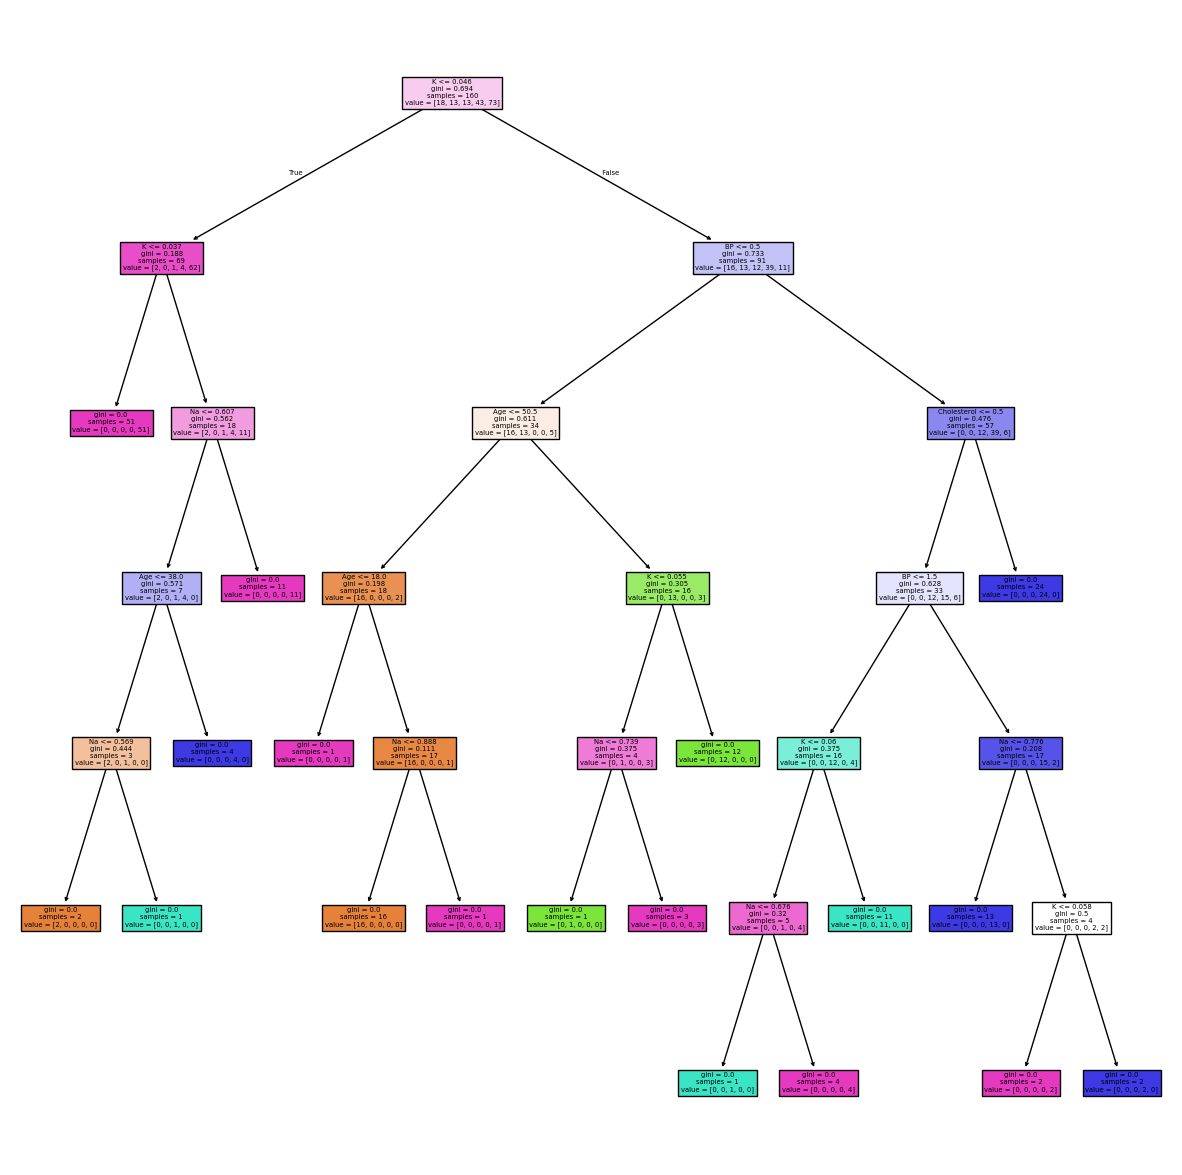

In [28]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dt,feature_names=features.columns,filled=True)
plt.show()
## checked every nodes and finfing pure nodes

In [29]:
dt.get_depth() 

6

In [30]:
dt.get_n_leaves()

np.int64(18)

In [31]:
# to deal with overfitting apply pruning techinques
parameters={
    "max_depth":list(range(1,4)),
    "min_samples_split": list(range(1,4))
}


In [32]:
# usuning GirdSearchCV
from sklearn.model_selection import GridSearchCV

In [33]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters,verbose=2)
clf.fit(xtrain,ytrain)   #finding the optimal hyperparameters for an estimator

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samp

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=2)

In [34]:
c=mymodel(clf.best_estimator_)
c

Training Score : 0.8375
Testing Score : 0.8
Confusion Matrix : 
[[ 4  0  0  1  0]
 [ 0  3  0  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0 11  0]
 [ 1  0  0  3 14]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80         5
         1.0       1.00      1.00      1.00         3
         2.0       0.00      0.00      0.00         3
         3.0       0.61      1.00      0.76        11
         4.0       1.00      0.78      0.88        18

    accuracy                           0.80        40
   macro avg       0.68      0.72      0.69        40
weighted avg       0.79      0.80      0.78        40



DecisionTreeClassifier(max_depth=3)

In [35]:
# creating a new columns after pruining
x["After pruning"]=c.feature_importances_
x

,columns,feature importance,After pruning
0,Age,0.150216,0.158451
1,Sex,0.000000,0.000000
2,BP,0.270077,0.241266
3,Cholesterol,0.057934,0.082611
4,Na,0.125732,0.078506
5,K,0.396041,0.439165


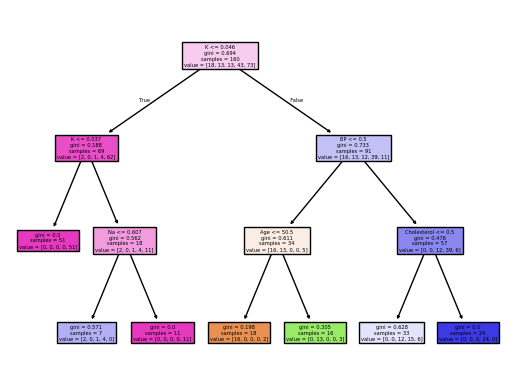

In [36]:
tree.plot_tree(c, feature_names = features.columns, filled=True)
plt.show()

In [37]:
r=mymodel(RandomForestClassifier())

Training Score : 1.0
Testing Score : 0.925
Confusion Matrix : 
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  1 10  0]
 [ 0  0  0  2 16]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         3
         2.0       0.75      1.00      0.86         3
         3.0       0.83      0.91      0.87        11
         4.0       1.00      0.89      0.94        18

    accuracy                           0.93        40
   macro avg       0.92      0.96      0.93        40
weighted avg       0.94      0.93      0.93        40



In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
xsample, ysample=ros.fit_resample(xtrain, ytrain)
ysample.value_counts()

Drug
4.0    73
3.0    73
2.0    73
0.0    73
1.0    73
Name: count, dtype: int64

In [40]:
model=DecisionTreeClassifier(max_depth=15, min_samples_split=12)
model.fit(xsample, ysample)
ypred=model.predict(xtest)
# overfitting-underfitting check
train_score=model.score(xtrain, ytrain)
test_score=model.score(xtest, ytest)
print("Training Score : ", {train_score})
print("Testing Score : ", {test_score})
print(f"Confusion Matrix : \n{confusion_matrix(ytest, ypred)}")
print(f"Classification Report : \n{classification_report(ytest, ypred)}")

Training Score :  {0.95}
Testing Score :  {0.925}
Confusion Matrix : 
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 3  0  0  0 15]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77         5
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         3
         3.0       1.00      1.00      1.00        11
         4.0       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.93      0.97      0.94        40
weighted avg       0.95      0.93      0.93        40



In [41]:
model=RandomForestClassifier(max_depth=25, n_estimators=80, min_samples_split=9)
model.fit(xsample, ysample)
ypred=model.predict(xtest)
# overfitting-underfitting check
train_score=model.score(xtrain, ytrain)
test_score=model.score(xtest, ytest)
print("Training Score : ", {train_score})
print("Testing Score : ", {test_score})
print(f"Confusion Matrix : \n{confusion_matrix(ytest, ypred)}")
print(f"Classification Report : \n{classification_report(ytest, ypred)}")

Training Score :  {0.96875}
Testing Score :  {0.85}
Confusion Matrix : 
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 2  0  1  3 12]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83         5
         1.0       1.00      1.00      1.00         3
         2.0       0.75      1.00      0.86         3
         3.0       0.79      1.00      0.88        11
         4.0       1.00      0.67      0.80        18

    accuracy                           0.85        40
   macro avg       0.85      0.93      0.87        40
weighted avg       0.89      0.85      0.85        40

